<a href="https://colab.research.google.com/github/lbushen/pytorch-tutorial/blob/main/basic_NN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

create a NN with the Iris flower dataset

In [39]:
# create a model class that inherits nn.Module
class Model(nn.Module):
  # input layer (4 features of the flower) --> hidden layer, number of neurons (H1) --> hidden layer H2 (n) --> output layer (3 classes of iris flowers)
  def __init__(self, in_features = 4, h1=8, h2=9, out_features = 3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1) # 'fc' stands for 'fully connected'
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  # create a function to move info forward through layers of the NN
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))

    return x


turn on NN

In [40]:
# pick a random seed for randomization
torch.manual_seed(41)

# create an instance of the Model
model = Model()

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# create url to load data
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [43]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


remove word labels and replace with numbers because ML likes numbers

In [44]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-44-31d2ab34cca2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [45]:
# train, test, split  set X, y
# drop the last column of the df
# X are the featurs, y is the outcome
X = my_df.drop('species', axis=1)
y = my_df['species']


In [46]:
# create chart to numpy array using the 'values' method from numpy
X = X.values
y = y.values

In [47]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)  #test-size is 20% of data, train with 80% of data

In [50]:
# convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [51]:
# convert y labels to long tensors; to change from 1.0 to 1
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [52]:
# set criterion of model - how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# choose Adam optimize, lr = learning rate (if our error doesn't go down after a bunch of iterations (epochs), lower the lr).  lower lr, longer to train model
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [53]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [57]:
# train our model
# how many epochs?
epochs = 100
losses = []
for i in range(epochs):
  # go forward and get prediction
  y_pred = model.forward(X_train) # get predicted results

  # measure the loss/error
  loss = criterion(y_pred, y_train)  # predicted values vs. y_train)

  # keep track of our losses - convert tensors to numpy values
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss {loss}')

  # do some back propagation; take the error rate of forward propagatioin
  # and feed it back through the nextwork to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()





Epoch: 0 and loss 1.1251550912857056
Epoch: 10 and loss 1.0096259117126465
Epoch: 20 and loss 0.8512223958969116
Epoch: 30 and loss 0.654869019985199
Epoch: 40 and loss 0.44905662536621094
Epoch: 50 and loss 0.2707386612892151
Epoch: 60 and loss 0.15461841225624084
Epoch: 70 and loss 0.09299226105213165
Epoch: 80 and loss 0.06447023898363113
Epoch: 90 and loss 0.050585027784109116


Text(0.5, 0, 'epochs')

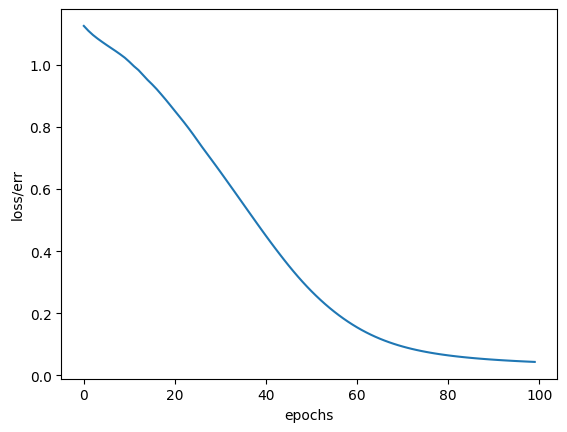

In [60]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/err")
plt.xlabel("epochs")